In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/Realtor_Data.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df
# data_types = realtor_file_df.dtypes
# data_types

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0


In [72]:
realtor_file_df.duplicated().sum()

926465

In [73]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4.0,3.0,0.09,Rosedale,New York,11422.0,NaN,3/18/2002,849990.0
1048539,for_sale,6.0,5.0,0.09,Rosedale,New York,11422.0,2315.0,4/9/2021,1279000.0
1048543,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,2/11/2021,190000.0
1048558,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,NaN,179000.0


In [74]:
nan_df = realtor_file_df.isna().any(axis=1)
nan_df

0           True
1           True
2           True
3           True
4           True
           ...  
1048570    False
1048571     True
1048572     True
1048573     True
1048574     True
Length: 1048575, dtype: bool

In [75]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0,Yes
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0,Yes
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0,Yes
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0,Yes


In [76]:
realtor_file_df.fillna(0,inplace=True)


In [77]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes


In [78]:
clean_df= new_york_df.describe().round(2)
clean_df

,bed,bath,acre_lot,zip_code,house_size,price
count,52742.00,52742.00,52742.00,52742.00,52742.00,5.274200e+04
mean,1.92,2.05,0.00,10134.47,947.69,2.616878e+06
std,1.60,1.54,0.01,344.30,1582.60,4.566627e+06
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00
25%,1.00,1.00,0.00,10016.00,0.00,6.985000e+05
50%,2.00,2.00,0.00,10023.00,638.00,1.280000e+06
75%,3.00,3.00,0.00,10036.00,1318.00,2.750000e+06
max,40.00,45.00,0.36,11697.00,61839.00,1.350000e+08


In [79]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,1.000000,1.000000,0.960445,0.582387,-0.156262
bath,1.000000,1.000000,1.000000,0.960455,0.582463,-0.156170
acre_lot,1.000000,1.000000,1.000000,0.960363,0.581805,-0.156968
zip_code,0.960445,0.960455,0.960363,1.000000,0.642844,-0.049328
house_size,0.582387,0.582463,0.581805,0.642844,1.000000,0.711886
price,-0.156262,-0.156170,-0.156968,-0.049328,0.711886,1.000000


<Axes: >

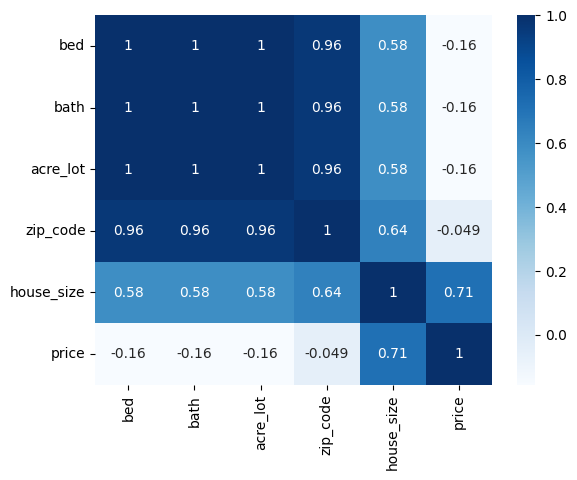

In [80]:
sns.heatmap(clean_df.corr(), annot=True, cmap="Blues")

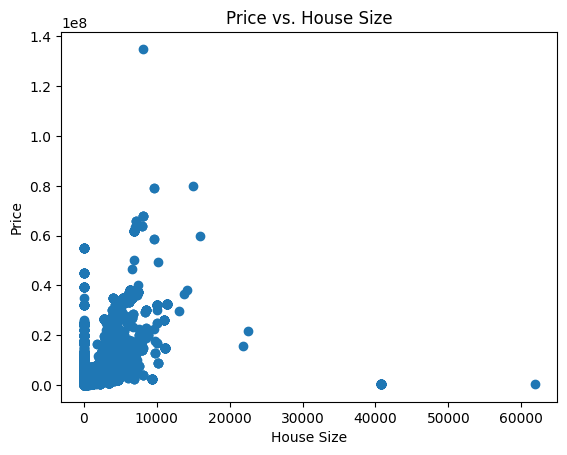

In [81]:
plt.scatter(new_york_df['house_size'], new_york_df['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Price vs. House Size')
plt.show()

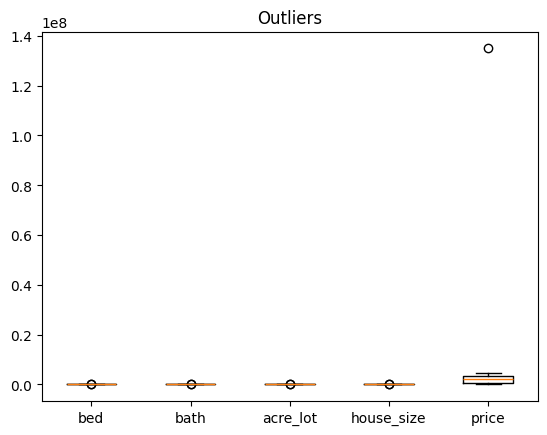

In [82]:
x_axis=['bed','bath','acre_lot','house_size','price']


plt.boxplot(clean_df[x_axis])
plt.xticks([1, 2, 3, 4, 5], x_axis)
plt.title('Outliers')
plt.show()